<a href="https://colab.research.google.com/github/ReinaldoJr10/Analise-de-restaurante-usando-ML/blob/main/Semin%C3%A1rio_IA_Reinaldo_e_Rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de reviews de restaurante usando o algoritmo de Naives Bayes, árvore de decisão e MLP

## 1) Descrição do problema:
<p> O problema escolhido pede para analisarmos uma serie de dados em forma de texto. Nele somos apresentados a um banco de dados com diversas avalicões de clientes sobre um restarante. O objetivo principal do programa é avaliar se o cliente gostou ou não de comer naquele restaurante. Para conseguir chegar nessa metrica, usamos o algoritmo de Naives Bayes para construir uma predição sobre os clientes usando as palavras contidas nas avaliações como parâmetro principal para alimentar o algoritmo.</p> 

---


<p>O link para download do dataset é: https://www.kaggle.com/datasets/maher3id/restaurant-reviewstsv?resource=download.</p>
<p> E o link do problema é: https://machinehack.com/practices/machine_learning_with_text_data/reviews_classification_using_svc_naive_bayes_random_forest/</p>

## 2) Apresentação da metodologia
<p>Começamos a resolver o problema importando as bibliotecas usadas no algoritmo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Abaixo lemos o dataset e verificamos que ele possui apenas 2 colunas, a primeira é usada para armazenar a avaliação do cliente e segunda para guardar a informação se o cliente gostou ou não do restarante. Por ser um banco de dados organizado por espaços de tabulação colocamos o '\t' como delimitador dos parâmetros.

In [ ]:
dba=pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')

Agora fazemos o processamentos das palavras contidas no texto de avaliação e colocamos cada conjunto de palavras em uma posição de um grande vetor. Para melhorar a precisão, retiramos todas as palavras sem valor útil e convertemos todas as palavras para minusculos para evitar mais de uma versão de uma única palavra.

In [ ]:
avaliacoes = []
stopWords = stopwords.words('english')
stopWords.remove('not')

for i in range(len(dba)):
    analise = re.sub('[^a-zA-Z]', ' ', dba['Review'][i]).lower().split()
    analise = [PorterStemmer().stem(palavra) for palavra in analise if not palavra in set(stopWords)] 
    avaliacoes.append(' '.join(analise))
  
    

Abaixo convertemos o vetor de palavras das avaliações em uma matriz de numeros para alimentar os algoritmos que criamos mais abaixo.

In [ ]:
conversor = CountVectorizer()
X_dba = conversor.fit_transform(avaliacoes).toarray()
y_dba = dba.iloc[:, 1].values

X_treino, X_teste, y_treino, y_teste = train_test_split(X_dba , y_dba, test_size = 0.25, random_state = 0)

Em seguida, usaremos os dados de x e y para treinar três algoritmos diferentes, o Naives Bayes, a árvore de decisão e perceptron multicamadas (MLP). Também mostramos o nivel de acurácia de cada um com base nos respectivos algoritmos.

In [ ]:
AlgoritmoNB = GaussianNB().fit(X_treino, y_treino)
y_resultados_NB = AlgoritmoNB.predict(X_teste)

AlgoritmoArvoreDecisao=DecisionTreeClassifier(min_samples_leaf=2).fit(X_treino, y_treino)
y_resultados_ArvoreDecisao=AlgoritmoArvoreDecisao.predict(X_teste)

AlgoritmoMLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X_treino, y_treino)
y_resultados_MLP=AlgoritmoMLP.predict(X_teste)


## 3) Analise dos resultados
A primeira comparação que fazemos é a analise das acurácias de cada modelo. Conseguimos ver que os melhor resultado é o MLP

In [ ]:
print("A acurácia do modelo usando o algoritmo de Naives Bayes é ",AlgoritmoNB.score(X_teste,y_teste))
print("A acurácia do modelo usando o algoritmo da árvore de decisão é ",AlgoritmoArvoreDecisao.score(X_teste,y_teste))
print("A acurácia do modelo usando o algoritmo de Multi-Camadas Perceptron(MLP) é ",AlgoritmoMLP.score(X_teste,y_teste))

A acurácia do modelo usando o algoritmo de Naives Bayes é  0.72
A acurácia do modelo usando o algoritmo da árvore de decisão é  0.728
A acurácia do modelo usando o algoritmo de Multi-Camadas Perceptron(MLP) é  0.756


Agora criamos uma matriz de confusão para conseguir fazer a analise da performance dos modelos para os dados de teste positivos e negativos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

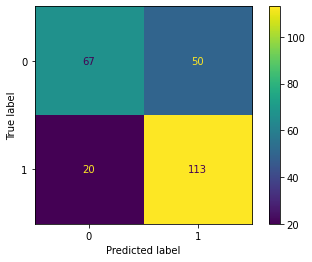

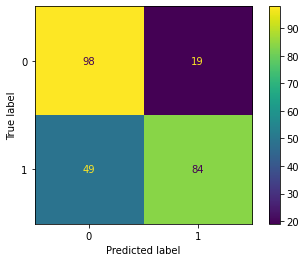

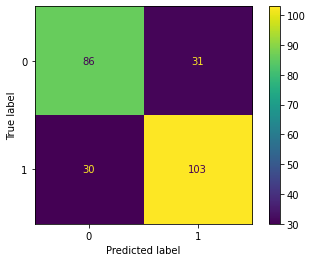

In [ ]:
plot_confusion_matrix(AlgoritmoNB, X_teste, y_teste)
plot_confusion_matrix(AlgoritmoArvoreDecisao, X_teste, y_teste)
plot_confusion_matrix(AlgoritmoMLP, X_teste, y_teste)

Naive Bayes

In [ ]:
print(metrics.classification_report(y_teste,y_resultados_NB))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66       117
           1       0.69      0.85      0.76       133

    accuracy                           0.72       250
   macro avg       0.73      0.71      0.71       250
weighted avg       0.73      0.72      0.71       250



Árvore de Decisões

In [ ]:
print(metrics.classification_report(y_teste,y_resultados_ArvoreDecisao))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       117
           1       0.82      0.63      0.71       133

    accuracy                           0.73       250
   macro avg       0.74      0.73      0.73       250
weighted avg       0.75      0.73      0.73       250



MLP

In [ ]:
print(metrics.classification_report(y_teste,y_resultados_MLP))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       117
           1       0.77      0.77      0.77       133

    accuracy                           0.76       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.76      0.76      0.76       250



Abaixo vamos montar o gráfico ROC para cada modelo e tentar avaliar qual foi o melhor modelo gerado.

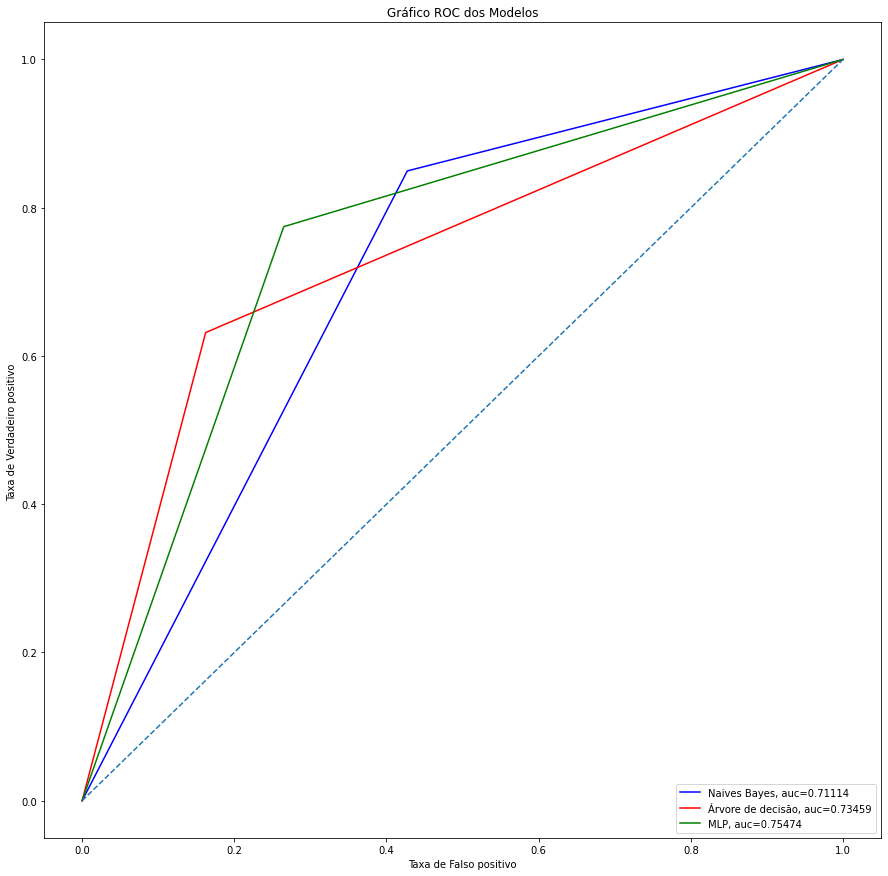

In [ ]:
falso_positivo_taxa_NB, Verdadeiro_positivo_taxa_NB, p1 = roc_curve(y_teste, y_resultados_NB)
falso_positivo_taxa_Arvore, Verdadeiro_positivo_taxa_Arvore, p2 = roc_curve(y_teste, y_resultados_ArvoreDecisao)
falso_positivo_taxa_MLP, Verdadeiro_positivo_taxa_MLP, p3 = roc_curve(y_teste, y_resultados_MLP)

plt.subplots(1, figsize=(15,15))
plt.title('Gráfico ROC dos Modelos')
plt.plot(falso_positivo_taxa_NB, Verdadeiro_positivo_taxa_NB,'b',label="Naives Bayes, auc="+str(round(roc_auc_score(y_teste, y_resultados_NB),5)))
plt.plot(falso_positivo_taxa_Arvore, Verdadeiro_positivo_taxa_Arvore,'r',label="Árvore de decisão, auc="+str(round(roc_auc_score(y_teste, y_resultados_ArvoreDecisao),5)))
plt.plot(falso_positivo_taxa_MLP, Verdadeiro_positivo_taxa_MLP,'g',label="MLP, auc="+str(round(roc_auc_score(y_teste, y_resultados_MLP),5)))
plt.plot([0, 1], ls="--")

plt.ylabel('Taxa de Verdadeiro positivo ')
plt.xlabel('Taxa de Falso positivo')
plt.legend(loc=4)
plt.show()

## 4) Considerações finais
<p>   Obtivemos um porcentagem de acerto no melhor algoritmo, por volta dos 75% nas previsões, o que ainda pode-se melhorar muito mais, talvez numa melhor forma de tratar os dados.

  Alguns pontos a destacar pelos dados obtidos, é em relação a matriz de confusão, podemos perceber que o algoritmo Naives Bayes é muito mais eficiente na previsão dos casos positivos do que nos casos negativos, já o algoritmo da Arvore de Decisões é o contrário e o MLP fica no meio termo sendo um algoritmo OK para ambas situações.
  
  Agora em relação a ácuracia,f1-score e o gráfico ROC é possivel concluir que o modelo com o melhor resultado e que obteve a melhor pontuação foi o algoritmo de MLP. Apesar disso, o modelo de Naives Bayes obteve um resultado OK com um custo computacional mais leve e a preferência de uso dependeria se iriamos querer precisão ou um algoritmo mais rápido. </p>